### Importação dos dados



In [437]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [438]:
print(f"Loja 1 tem {len(loja)} registros")
print(f"Loja 2 tem {len(loja2)} registros")
print(f"Loja 3 tem {len(loja3)} registros")
print(f"Loja 4 tem {len(loja4)} registros")

Loja 1 tem 2359 registros
Loja 2 tem 2359 registros
Loja 3 tem 2359 registros
Loja 4 tem 2358 registros


In [439]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

In [440]:
todas_lojas = pd.concat([loja, loja2, loja3, loja4])

print(f"Todas: {len(todas_lojas)} vendas no total")
print(f"Colunas: {list(todas_lojas.columns)}")

Todas: 9435 vendas no total
Colunas: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja']


In [441]:
faturamento_loja = todas_lojas.groupby('Loja')['Preço'].sum()

print("Faturamento total de cada loja:")
for loja, valor in faturamento_loja.items():
    print(f"{loja}: R$ {valor:,.2f}")

Faturamento total de cada loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


In [442]:
faturamento_ordenado = faturamento_loja.sort_values(ascending=False)
print(f"Loja que mais vendeu: {faturamento_ordenado.index[0]}")
print(f"Valor: R$ {faturamento_ordenado.iloc[0]:,.2f}")

Loja que mais vendeu: Loja 1
Valor: R$ 1,534,509.12


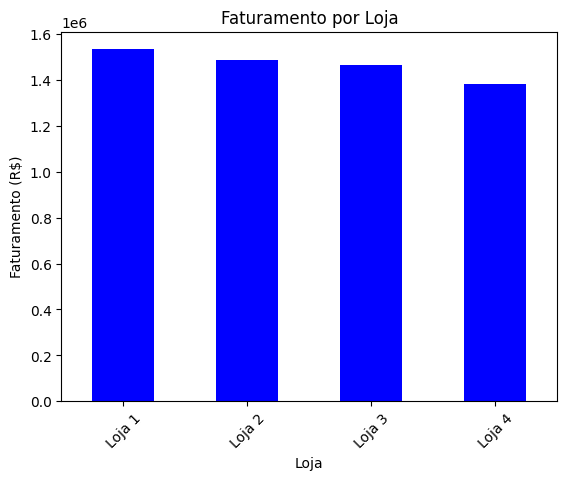

In [443]:
plt.figure()
faturamento_loja.plot(kind='bar', color=['blue'])
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.show()

# 2. Vendas por Categoria


In [444]:
vendas_por_categoria = todas_lojas['Categoria do Produto'].value_counts()

print("Quantidade de vendas por categoria:")
for categoria, qtd in vendas_por_categoria.items():
    print(f"{categoria}: {qtd} vendas")

Quantidade de vendas por categoria:
moveis: 1886 vendas
eletronicos: 1772 vendas
brinquedos: 1290 vendas
eletrodomesticos: 1149 vendas
esporte e lazer: 1113 vendas
instrumentos musicais: 753 vendas
livros: 742 vendas
utilidades domesticas: 730 vendas


In [445]:
faturamento_categoria = todas_lojas.groupby('Categoria do Produto')['Preço'].sum()
print("Faturamento por categoria:")
for categoria, valor in faturamento_categoria.sort_values(ascending=False).items():
    print(f"{categoria}: R$ {valor:,.2f}")

Faturamento por categoria:
eletronicos: R$ 2,214,099.72
eletrodomesticos: R$ 1,766,337.03
moveis: R$ 1,010,214.00
instrumentos musicais: R$ 465,029.67
esporte e lazer: R$ 190,635.39
brinquedos: R$ 98,140.86
utilidades domesticas: R$ 76,773.38
livros: R$ 50,260.74


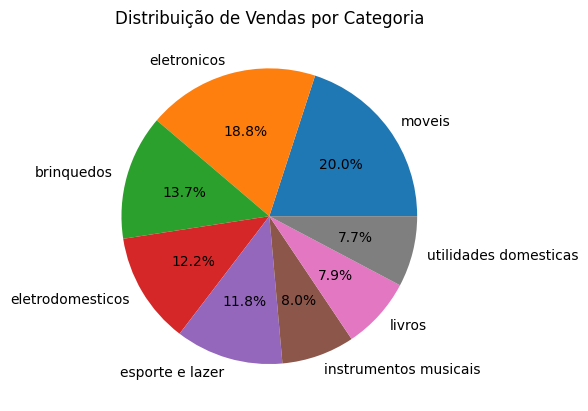

In [446]:
plt.figure()
vendas_por_categoria.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Vendas por Categoria')
plt.ylabel('')
plt.show()

In [447]:
vendas_categoria_total = todas_lojas.groupby("Categoria do Produto").agg({
    "Produto": "count",
    "Preço": "sum"
}).rename(columns={"Produto": "Quantidade", "Preço": "Valor Total (R$)"})

vendas_categoria_total["Valor Total (R$)"] = vendas_categoria_total["Valor Total (R$)"].map(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

print("Vendas por Categoria")
print(vendas_categoria_total.to_string())

total_geral_todas = todas_lojas["Preço"].sum()
total_formatado_todas = f"R$ {total_geral_todas:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
print(f"Total geral de vendas (TODAS AS LOJAS): {total_formatado_todas}")

Vendas por Categoria
                       Quantidade Valor Total (R$)
Categoria do Produto                              
brinquedos                   1290     R$ 98.140,86
eletrodomesticos             1149  R$ 1.766.337,03
eletronicos                  1772  R$ 2.214.099,72
esporte e lazer              1113    R$ 190.635,39
instrumentos musicais         753    R$ 465.029,67
livros                        742     R$ 50.260,74
moveis                       1886  R$ 1.010.214,00
utilidades domesticas         730     R$ 76.773,38
Total geral de vendas (TODAS AS LOJAS): R$ 5.871.490,79


In [448]:
print("Valor médio por venda:")
ticket_medio = todas_lojas.groupby('Loja')['Preço'].mean().sort_values(ascending=False)
for loja, ticket in ticket_medio.items():
    print(f"   {loja}: R$ {ticket:.2f}")

Valor médio por venda:
   Loja 1: R$ 650.49
   Loja 2: R$ 630.97
   Loja 3: R$ 620.61
   Loja 4: R$ 587.15


# 3. Média de Avaliação das Lojas

In [449]:
avaliacao_media = todas_lojas.groupby('Loja')['Avaliação da compra'].mean()

print("Avaliação média de cada loja:")
for loja, media in avaliacao_media.items():
    print(f"{loja}: {media:.2f} estrelas")

Avaliação média de cada loja:
Loja 1: 3.98 estrelas
Loja 2: 4.04 estrelas
Loja 3: 4.05 estrelas
Loja 4: 4.00 estrelas


In [450]:
melhor_loja = avaliacao_media.idxmax()
melhor_nota = avaliacao_media.max()
print(f"Melhor avaliada: {melhor_loja} com {melhor_nota:.2f} estrelas")

Melhor avaliada: Loja 3 com 4.05 estrelas


In [451]:
print("Total de avaliações:")
distribuicao = todas_lojas['Avaliação da compra'].value_counts().sort_index()
for nota, qtd in distribuicao.items():
    print(f"{nota} estrelas: {qtd} avaliações")

Total de avaliações:
1 estrelas: 1199 avaliações
2 estrelas: 343 avaliações
3 estrelas: 830 avaliações
4 estrelas: 1813 avaliações
5 estrelas: 5250 avaliações


# 4. Produtos Mais e Menos Vendidos

In [452]:
vendas_por_produto = todas_lojas["Produto"].value_counts()

print("TOP 5 produtos mais vendidos:")
top_5 = vendas_por_produto.head(5)
for i, (produto, qtd) in enumerate(top_5.items(), 1):
    print(f"{i}º {produto}: {qtd} vendas")

print("TOP 5 produtos menos vendidos:")
bottom_5 = vendas_por_produto.tail(5)
for produto, qtd in bottom_5.items():
    print(f"{produto}: {qtd} vendas")

TOP 5 produtos mais vendidos:
1º Cômoda: 210 vendas
2º Carrinho controle remoto: 206 vendas
3º Micro-ondas: 206 vendas
4º Bateria: 203 vendas
5º Cama king: 201 vendas
TOP 5 produtos menos vendidos:
Ciência de dados com python: 166 vendas
Guitarra: 165 vendas
Mochila: 163 vendas
Headset: 158 vendas
Celular ABXY: 157 vendas


# 5. Frete Médio por Loja


In [453]:
frete_medio = todas_lojas.groupby('Loja')['Frete'].mean()

print("Frete médio de cada loja:")
for loja, media in frete_medio.items():
    print(f"{loja}: R$ {media:.2f}")

Frete médio de cada loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


In [454]:
loja_frete_caro = frete_medio.idxmax()
valor_frete_caro = frete_medio.max()
print(f"Frete mais caro: {loja_frete_caro} (R$ {valor_frete_caro:.2f})")

Frete mais caro: Loja 1 (R$ 34.69)


In [455]:
loja_frete_barato = frete_medio.idxmin()
valor_frete_barato = frete_medio.min()
print(f"Frete mais barato: {loja_frete_barato} (R$ {valor_frete_barato:.2f})")

Frete mais barato: Loja 4 (R$ 31.28)


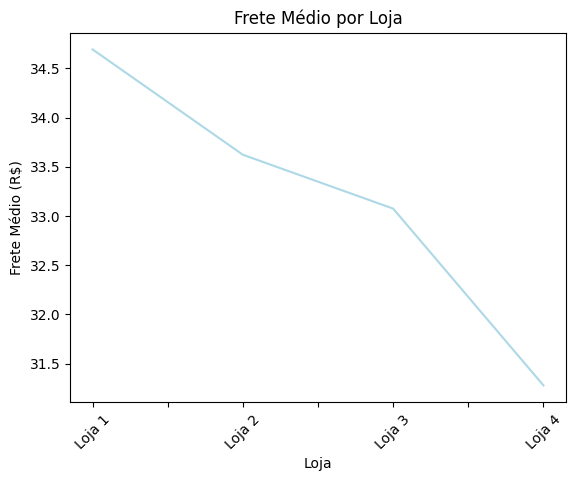

In [456]:
plt.figure()
frete_medio.plot(kind='line', color='lightblue')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.xticks(rotation=45)
plt.show()

In [457]:
print(f"Loja com melhor faturamento: {faturamento_ordenado.index[0]}")
print(f"Categoria que mais vende: {vendas_por_categoria.index[0]}")
print(f"Loja melhor avaliada: {melhor_loja}")
print(f"Produto mais vendido: {top_5.index[0]}")
print(f"Loja com frete mais caro: {loja_frete_caro}")

Loja com melhor faturamento: Loja 1
Categoria que mais vende: moveis
Loja melhor avaliada: Loja 3
Produto mais vendido: Cômoda
Loja com frete mais caro: Loja 1


RELATÓRIO DE ANÁLISE DE DESEMPENHO DAS LOJAS

O objetivo dessa análise é ajudar o Senhor João a decidir qual loja vale mais a pena vender. Para isso, considerei vários fatores importantes, como o faturamento total, quais categorias de produtos vendem mais e menos, a média das avaliações dos clientes, o volume de vendas, o ticket médio e o custo do frete. A ideia é usar esses dados para entender qual loja tem o melhor desempenho geral.

Análise da Loja 4
Aqui estão os principais pontos que encontrei para a Loja 4:

O faturamento dela foi de R$ 1.384.497,58, ficando em 4º lugar entre as lojas.

O número de vendas foi 2.358, também na 4ª posição.

O ticket médio, que é quanto o cliente gasta em média por compra, foi R$ 587,15, outro indicador em 4º lugar.

A satisfação dos clientes é boa, com média de 4,0 estrelas de 5, ficando em 3º lugar.

O frete médio é de R$ 31,28, o que é razoável e ajuda a manter a experiência positiva para o cliente.

Por tudo isso, minha recomendação é que o Senhor João escolha a Loja 4 para vender.